<a href="https://colab.research.google.com/github/dimLMT/Metabolic-Syndrome-Forecast/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fpath = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/Metabolic  Syndrome.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(fpath)
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


# Inspect and clean the Data

In [8]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.\n')
# Display the column names, count of non-null values, and their datatypes
df.info()

There are 2401 rows, and 15 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)

In [9]:
df['seqn'].nunique()

2401

In [10]:
#'seqn' column has 2401 unique values which is 100.0% cardinality.
df = df.set_index('seqn')
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
seqn,,,,,,,,,,,,,,
62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [11]:
# Display the descriptive statistics for the numeric columns
df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [12]:
# Display the descriptive statistics for the non-numeric columns
df.describe(exclude="number")

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


In [15]:
cat_cols = df.select_dtypes('object').columns
for cols in cat_cols:
  print(df[cols].value_counts(),'\n')

Female    1211
Male      1190
Name: Sex, dtype: int64 

Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: Marital, dtype: int64 

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64 

No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64 



In [13]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


<Axes: >

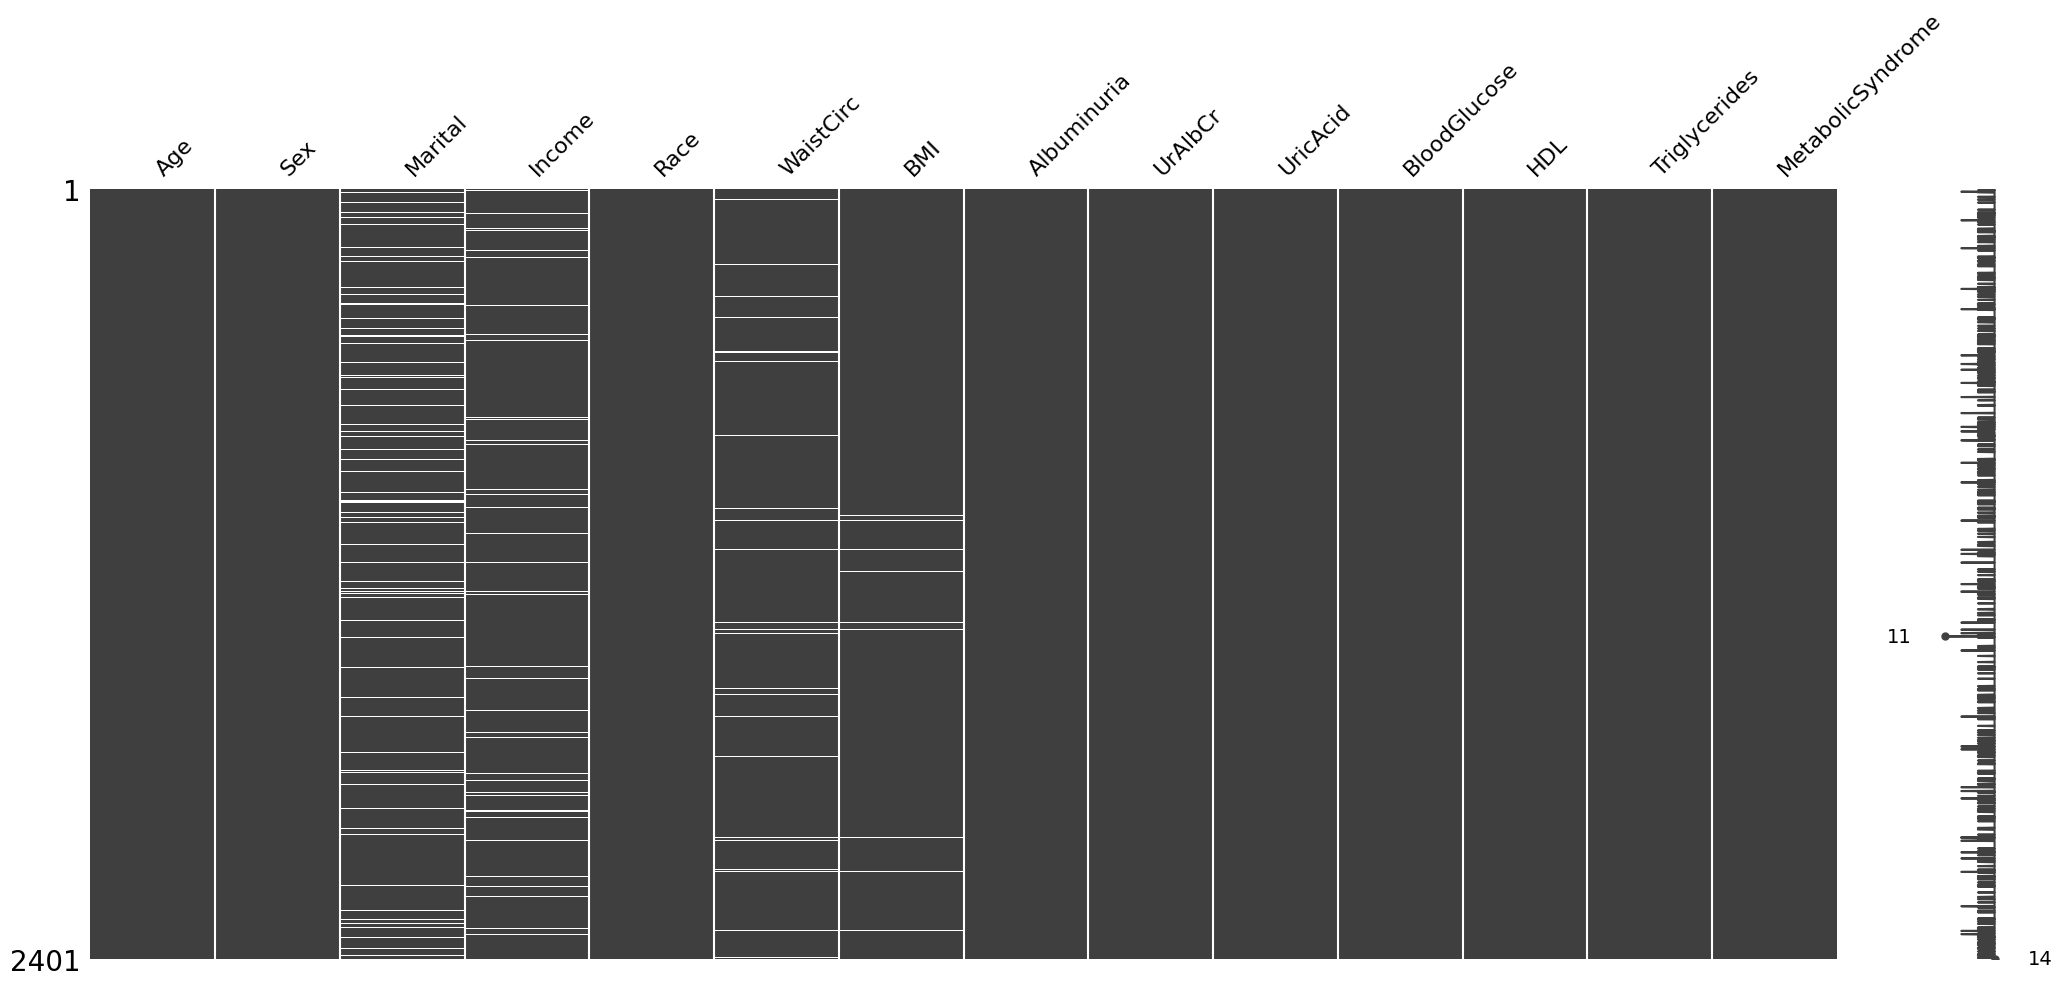

In [14]:
import missingno as msno
msno.matrix(df)

# Exploratory Visualizations

In [66]:
def explore_numeric(df, x, figsize=(6,5)):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

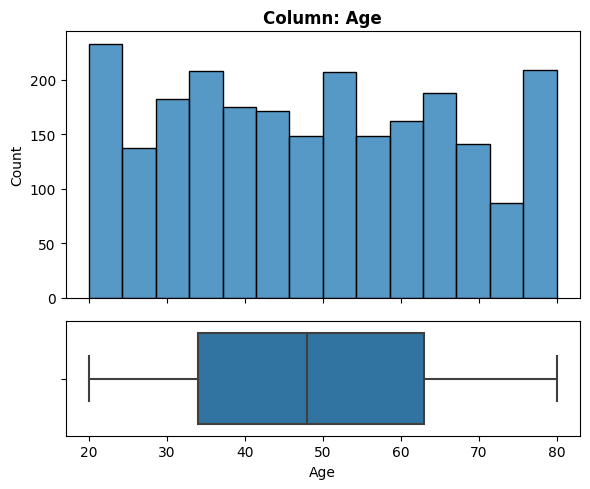

- NaN's Found: 0 (0.0%)
- Unique Values: 61
- Most common value: '80' occurs 124 times (5.16%)
- Not constant or quasi-constant.


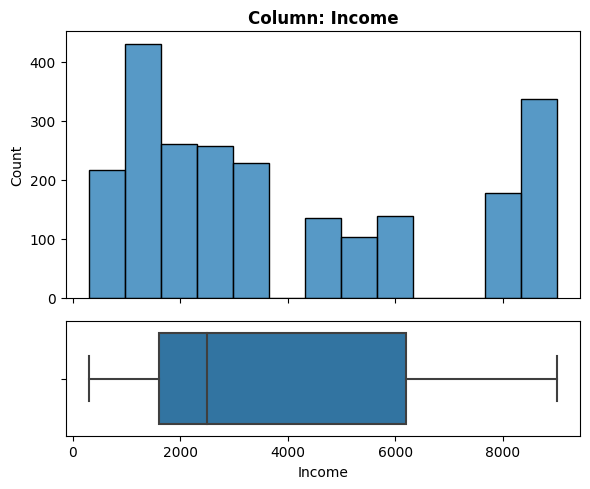

- NaN's Found: 117 (4.87%)
- Unique Values: 14
- Most common value: '9000.0' occurs 337 times (14.04%)
- Not constant or quasi-constant.


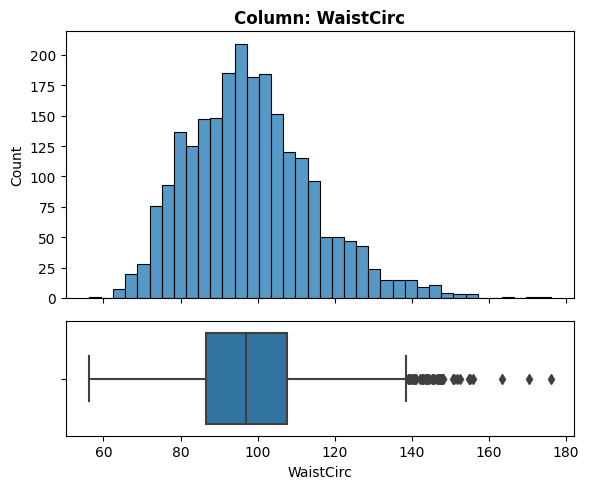

- NaN's Found: 85 (3.54%)
- Unique Values: 635
- Most common value: 'nan' occurs 85 times (3.54%)
- Not constant or quasi-constant.


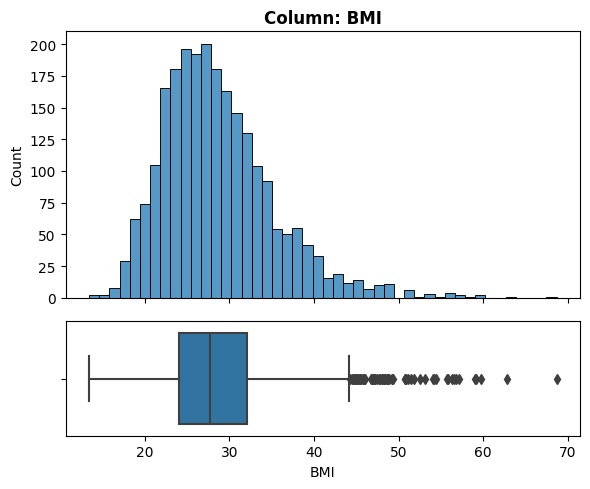

- NaN's Found: 26 (1.08%)
- Unique Values: 322
- Most common value: 'nan' occurs 26 times (1.08%)
- Not constant or quasi-constant.


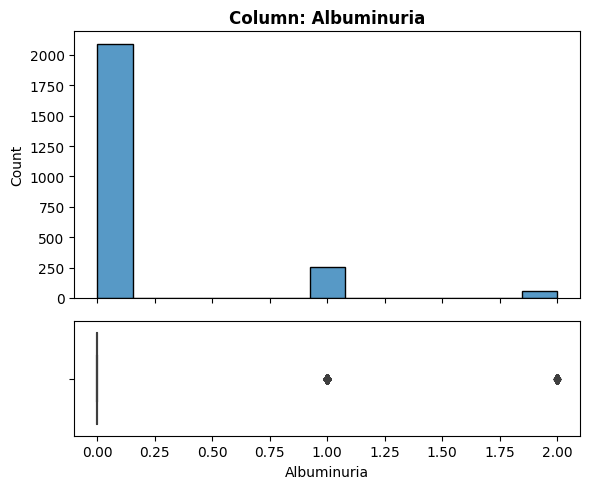

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: '0' occurs 2089 times (87.01%)
- Not constant or quasi-constant.


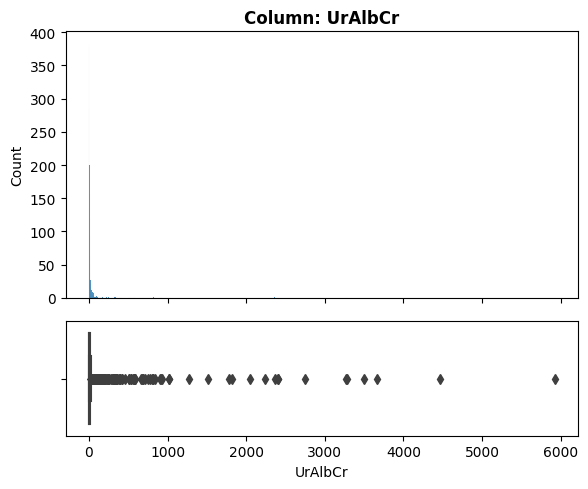

- NaN's Found: 0 (0.0%)
- Unique Values: 1383
- Most common value: '5.0' occurs 18 times (0.75%)
- Not constant or quasi-constant.


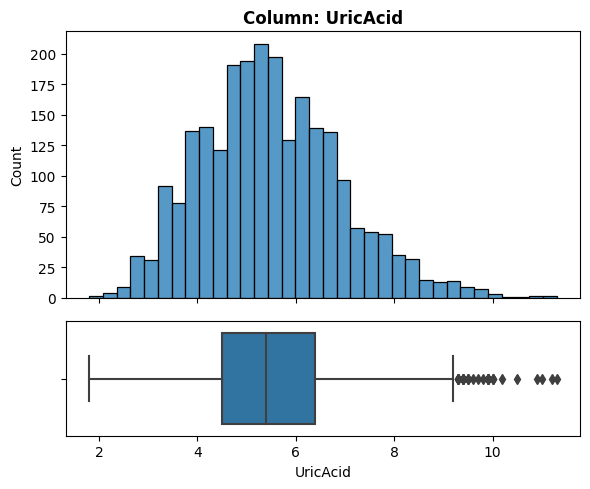

- NaN's Found: 0 (0.0%)
- Unique Values: 88
- Most common value: '5.2' occurs 77 times (3.21%)
- Not constant or quasi-constant.


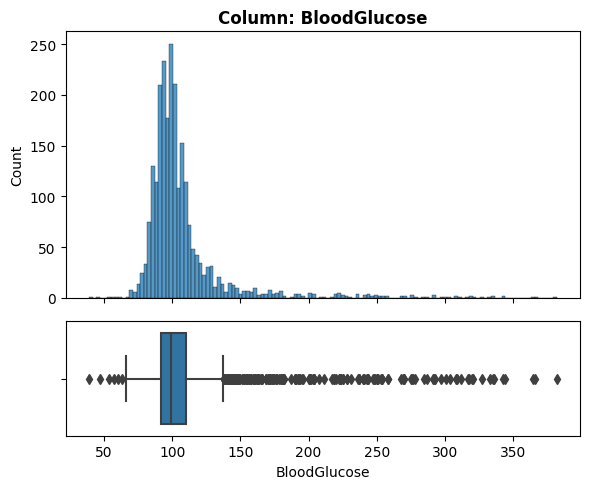

- NaN's Found: 0 (0.0%)
- Unique Values: 187
- Most common value: '97' occurs 90 times (3.75%)
- Not constant or quasi-constant.


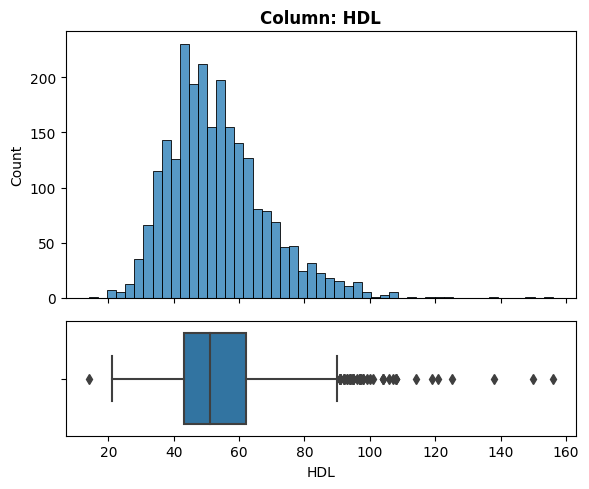

- NaN's Found: 0 (0.0%)
- Unique Values: 93
- Most common value: '48' occurs 87 times (3.62%)
- Not constant or quasi-constant.


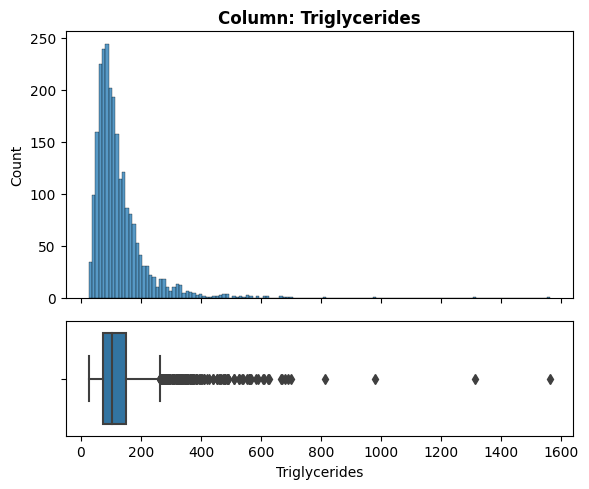

- NaN's Found: 0 (0.0%)
- Unique Values: 345
- Most common value: '75' occurs 34 times (1.42%)
- Not constant or quasi-constant.


In [67]:
# for Numeric Columns
num_cols = df.select_dtypes('number').columns
for col in num_cols:
  explore_numeric(df, col)

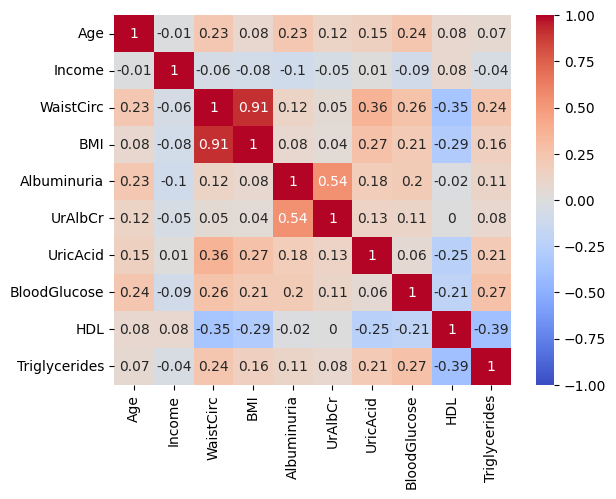

In [24]:
corr = df.corr(numeric_only=True).round(2)
ax = sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1);

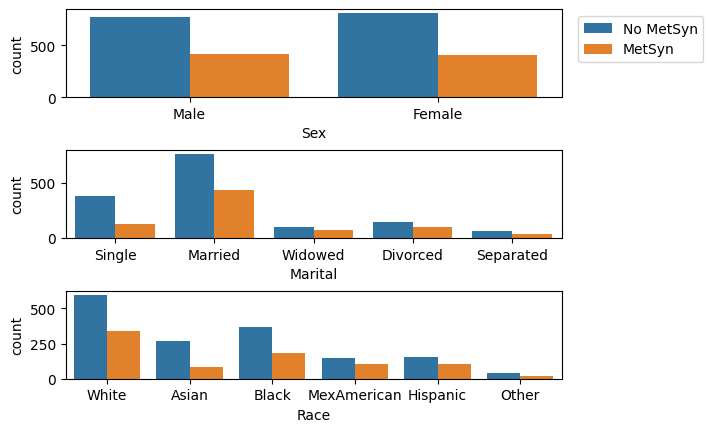

In [65]:
# for categorial features
# using the variable axs for multiple Axes
fig, ax = plt.subplots(3)
plt.subplots_adjust(hspace=0.6)
sns.countplot(data=df, x='Sex', hue='MetabolicSyndrome', ax=ax[0])
ax[0].legend(bbox_to_anchor=(1.3, 1))
sns.countplot(data=df, x='Marital', hue='MetabolicSyndrome', ax=ax[1])
ax[1].get_legend().remove()
sns.countplot(data=df, x='Race', hue='MetabolicSyndrome', ax=ax[2])
ax[2].get_legend().remove();